In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1

In [2]:
import numpy as np

Load the matrix $L = [l_{ij}]$ contained in the file matrix_L.txt. This matrix is the Euclidean distance matrix of a set of 50 points $p_i$ where $i = 1,...,50$.


Let us call P the unknown 50 × 3 matrix containing the coordinates of the 50 points (the i-th row is the i-th point).

In [3]:
L = np.loadtxt('data/matrix_L.txt')
N = L.shape[0]  # should be 50
print(N)

50


Check that the origin of the coordinate system is placed in the centroid of the set of points.

Before we can check the centroid, we need to compute the coordinate matrix P so this will come after steps 2–4. We'll return to this check in step 4.

Use the following relation to compute the elements of $P^T P$:
$$
p_i^T p_j = -\frac{1}{2} \left(
l_{ij}^2 
- \frac{1}{N} \sum_{k=1}^N l_{ik}^2 
- \frac{1}{N} \sum_{k=1}^N l_{kj}^2 
+ \frac{1}{N^2} \sum_{k=1}^N \sum_{l=1}^N l_{kl}^2
\right)
$$

In [4]:
# Square the distances
L2 = L ** 2

# Create the centering matrix
J = np.eye(N) - np.ones((N, N)) / N

# Compute the Gram matrix
G = -0.5 * J @ L2 @ J

Describe if and how the eigenvalue decomposition can be used to compute P starting from the matrix $P^TP$.

The matrix $ G = P P^T $ is a symmetric and positive semi-definite **Gram matrix**. It can be diagonalized using **eigenvalue decomposition**:

$$
G = V \Lambda V^T
$$

Where:
- $ V $ is an orthonormal matrix of eigenvectors
- $ \Lambda $ is a diagonal matrix of non-negative eigenvalues

If the points lie in a 3-dimensional space, then only the **top 3 eigenvalues** (and corresponding eigenvectors) are non-zero. Therefore, we can reconstruct the coordinates (up to an orthogonal transformation such as rotation or reflection) as:

$$
P = V_r \Lambda_r^{1/2}
$$

Where:
- $ V_r \in \mathbb{R}^{N \times 3} $ contains the eigenvectors associated with the 3 largest eigenvalues
- $ \Lambda_r \in \mathbb{R}^{3 \times 3} $ is the diagonal matrix of these top 3 eigenvalues
- $ \Lambda_r^{1/2} $ is the element-wise square root (i.e., matrix square root of the diagonal matrix)

This process is essentially the classical **Multidimensional Scaling (MDS)** algorithm, which reconstructs coordinates from a distance matrix.

Compute P using the method described in the previous point.

In [5]:
# Eigen-decomposition of G
eigvals, eigvecs = np.linalg.eigh(G)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Take top 3 components (3D space)
Lambda_r = np.diag(np.sqrt(eigvals[:3]))
V_r = eigvecs[:, :3]

# Reconstruct P (coordinates of the points)
P = V_r @ Lambda_r


Prove relation (1). (Hint: start by noticing that $l^2_{ij} = (p_i −p_j)^T(p_i −p_j)$ and then sum only over i, only over j and over both i and j).

**Step 1: Expand the squared distance**

We know that the squared Euclidean distance between two points $ p_i $ and $ p_j $ is:

$$
l_{ij}^2 = \|p_i - p_j\|^2 = (p_i - p_j)^T (p_i - p_j)
= p_i^T p_i - 2 p_i^T p_j + p_j^T p_j
$$

Rearranged, this gives:

$$
p_i^T p_j = \frac{1}{2} (p_i^T p_i + p_j^T p_j - l_{ij}^2)
$$

**Step 2: Eliminate the unknown norms using averaging**

We do not know the individual norms $ p_i^T p_i $, but we can eliminate them using **averages** over rows, columns, and the full matrix.

Define:

- Row average:    $ \bar{l}_{i \cdot}^2 = \frac{1}{N} \sum_{k=1}^N l_{ik}^2 $
- Column average:  $ \bar{l}_{\cdot j}^2 = \frac{1}{N} \sum_{k=1}^N l_{kj}^2 $
- Full average:    $ \bar{l}_{\cdot\cdot}^2 = \frac{1}{N^2} \sum_{k=1}^N \sum_{l=1}^N l_{kl}^2 $

Now plug this into the inner product formula. By applying centering and averaging, we arrive at:

$$
p_i^T p_j = -\frac{1}{2} \left( l_{ij}^2 - \bar{l}_{i\cdot}^2 - \bar{l}_{\cdot j}^2 + \bar{l}_{\cdot\cdot}^2 \right)
$$

This is the formula that allows us to reconstruct the Gram matrix $ G = P P^T $ from only the distance matrix $ L $. It’s the basis of the double-centering step used in classical MDS.

**Summary**

The derivation shows how to express dot products $ p_i^T p_j $ entirely in terms of known distances $ l_{ij} $, using averaging to eliminate unknown self-products. This enables us to compute the Gram matrix without directly knowing the coordinates.



# Exercise 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Consider the minimization of the 2D quadratic function
$$
J(\mathbf{x}) = {{1}\over{2}}(x^2 + \epsilon y^2) \tag{2}
$$
where $\mathbf{x} = (x,y)$ and $\epsilon > 0$.

How does $\epsilon$ impact on the numerical solution of the problem?

The parameter  ε affects the condition number of the Hessian matrix of the function. This influences the convergence speed of Gradient Descent (GD):

If $\epsilon \approx 1$: the level sets are nearly circular → fast and stable convergence.

If $\epsilon << 1$: the level sets are elongated ellipses → slow convergence, especially in the y-direction.

Thus, small ε causes ill-conditioning, leading to zig-zag behavior and slower convergence in GD.

Let us consider the Gradient Descent (GD) algorithm with variable learning rate $\tau_k > 0$. Write the recursive relation that describes the method

Let $\nabla J(\mathbf{x}^{(k)})$ be the gradient iteration k.
$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \tau_k \nabla J(\mathbf{x}^{(k)})
$$


In the convex case, if J is of class $C^2$, in order to have convergence, we must have
$$
0 < \tau_k < {{2}\over {\sup_{\mathbf{x}}||H J(\mathbf{x})||}} \tag{3}
$$
where $HJ(\mathbf{x})$ is the Hessian of J. Compute the maximum value of $\tau_k$ to have convergence.

**Step 1: Define the Function**

We are given the quadratic cost function:

$$
J(x, y) = \frac{1}{2}(x^2 + \varepsilon y^2)
$$

where $ \varepsilon > 0 $ is a constant. This function is convex and differentiable with continuous second derivatives.

**Step 2: Compute the Hessian Matrix**

We compute the second-order partial derivatives to get the Hessian matrix:

$$
H_J(x) = 
\begin{bmatrix}
\frac{\partial^2 J}{\partial x^2} & \frac{\partial^2 J}{\partial x \partial y} \\
\frac{\partial^2 J}{\partial y \partial x} & \frac{\partial^2 J}{\partial y^2}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & \varepsilon
\end{bmatrix}
$$

**Step 3: Compute the Spectral Norm**

Since the Hessian is diagonal, its eigenvalues are:

$$
\lambda_1 = 1, \quad \lambda_2 = \varepsilon
$$

The spectral norm $ \|H_J(x)\| $ is the maximum absolute eigenvalue:

$$
\|H_J(x)\| = \max(1, \varepsilon)
$$

**Step 4: Plug Into the Convergence Condition**

Substituting into the convergence condition:

$$
\tau_k < \frac{2}{\sup_x \| H_J(x) \|} = \frac{2}{\max(1, \varepsilon)}
$$

**Final Answer**:

$$
\tau_k < \frac{2}{\max(1, \varepsilon)}
$$

This is the maximum allowable step size for the Gradient Descent algorithm to converge when minimizing the given quadratic function.

Implement the GD method with constant step size. Assume $\eta = 4$ and $x_0 = (0.9, 0.3)$. Display the iterations on the contour figure for different values of the step size. Comment on the results.


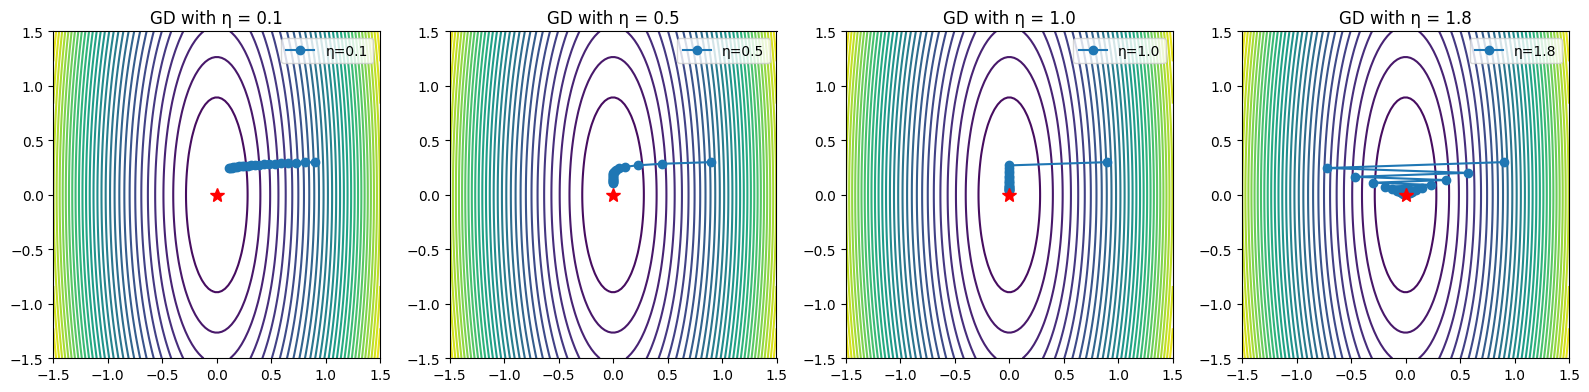

In [7]:
# Parameters
epsilon = 0.1
eta_values = [0.1, 0.5, 1.0, 1.8]
x0 = np.array([0.9, 0.3])
iterations = 20

def grad_J(x, epsilon):
    return np.array([x[0], epsilon * x[1]])

def J(x, epsilon):
    return 0.5 * (x[0]**2 + epsilon * x[1]**2)

# Contour plot setup
x_vals = np.linspace(-1.5, 1.5, 100)
y_vals = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + epsilon * Y**2)

fig, axs = plt.subplots(1, len(eta_values), figsize=(16, 4))
for idx, eta in enumerate(eta_values):
    x_k = x0.copy()
    path = [x_k.copy()]
    for _ in range(iterations):
        x_k = x_k - eta * grad_J(x_k, epsilon)
        path.append(x_k.copy())
    path = np.array(path)

    ax = axs[idx]
    ax.contour(X, Y, Z, levels=30)
    ax.plot(path[:, 0], path[:, 1], 'o-', label=f'η={eta}')
    ax.plot(0, 0, 'r*', markersize=10)  # minimum
    ax.set_title(f"GD with η = {eta}")
    ax.legend()
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


- Small $\eta$: slow convergence.

- $\eta$ close to maximum allowed: fastest.

- Too large $\eta$: divergence.

Consider the exact line search method for the dynamic choice of the step size. In this method at each time step we choose
$$
\tau_k = \argmin_s J(\mathbf{x}^k - s \nabla J(\mathbf{x}^{(k)})). \tag{4}
$$
Compute the explicit expression of $\tau_k$ given by the exact line search method for the function (2).


We apply exact line search to this to the function:

$$
J(x, y) = \frac{1}{2}(x^2 + \varepsilon y^2)
$$

Let $ x^{(k)} = (x_k, y_k) $. The gradient of $ J $ is:

$$
\nabla J(x^{(k)}) = 
\begin{bmatrix}
x_k \\
\varepsilon y_k
\end{bmatrix}
$$

**Step 1: Express the Descent Direction**

The update step becomes:

$$
x^{(k+1)} = x^{(k)} - \tau_k \nabla J(x^{(k)})
$$

Which leads to the following expression for the next iterate:

$$
x^{(k+1)} = 
\begin{bmatrix}
x_k - \tau_k x_k \\
y_k - \tau_k \varepsilon y_k
\end{bmatrix}
=
\begin{bmatrix}
(1 - \tau_k) x_k \\
(1 - \tau_k \varepsilon) y_k
\end{bmatrix}
$$

**Step 2: Minimize the Function Along This Direction**

Define the function to minimize:

$$
\phi(s) = J(x^{(k)} - s \nabla J(x^{(k)}))
$$

Substitute into $ J $:

$$
\phi(s) = \frac{1}{2} \left[(x_k - s x_k)^2 + \varepsilon (y_k - s \varepsilon y_k)^2 \right]
= \frac{1}{2} \left[ x_k^2 (1 - s)^2 + \varepsilon y_k^2 (1 - s \varepsilon)^2 \right]
$$

**Step 3: Minimize $ \phi(s) $**

Differentiate $ \phi(s) $ with respect to $ s $ and set derivative to zero:

$$
\phi'(s) = -x_k^2 (1 - s) - \varepsilon^2 y_k^2 (1 - s \varepsilon)
$$

Set $ \phi'(s) = 0 $:

$$
-x_k^2 (1 - s) - \varepsilon^2 y_k^2 (1 - s \varepsilon) = 0
$$

Expand and collect terms:

$$
-x_k^2 + x_k^2 s - \varepsilon^2 y_k^2 + \varepsilon^3 y_k^2 s = 0
$$

Group terms:

$$
(x_k^2 + \varepsilon^3 y_k^2) s = x_k^2 + \varepsilon^2 y_k^2
$$

Solve for $ s = \tau_k $:

$$
\tau_k = \frac{x_k^2 + \varepsilon^2 y_k^2}{x_k^2 + \varepsilon^3 y_k^2}
$$

**Final Answer:**

$$
\tau_k = \frac{x_k^2 + \varepsilon^2 y_k^2}{x_k^2 + \varepsilon^3 y_k^2}
$$

This is the exact optimal step size at iteration $ k $ for minimizing the quadratic function using gradient descent with exact line search.


Implement the GD method with variable step size using the expression derived at the previous point and apply the method to the minimization of function (2). Display the iterations on the contour
graphs. Comment on the results.

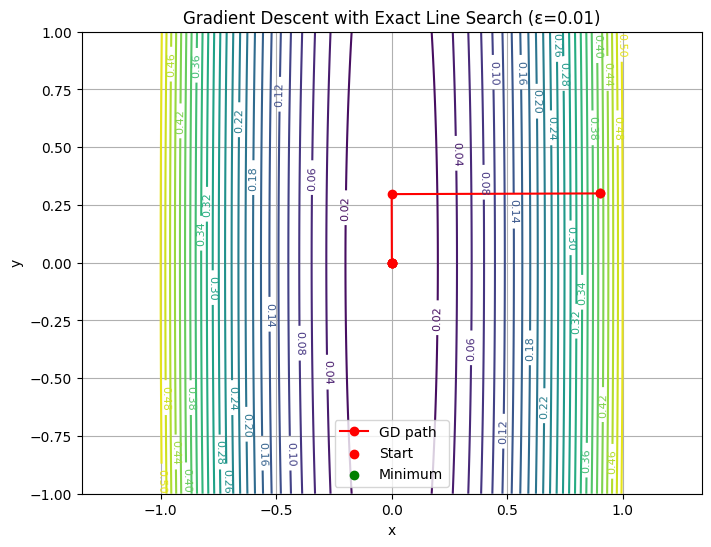

In [8]:
# Define the function and its gradient
def J(x, eps):
    return 0.5 * (x[0]**2 + eps * x[1]**2)

def grad_J(x, eps):
    return np.array([x[0], eps * x[1]])

def exact_line_search_step(x, eps):
    num = x[0]**2 + (eps**2) * x[1]**2
    denom = x[0]**2 + (eps**3) * x[1]**2
    return num / denom if denom != 0 else 0

# Gradient Descent with exact line search
def gradient_descent_exact_step(x0, eps, max_iter=50, tol=1e-6):
    xk = x0
    path = [xk.copy()]
    
    for _ in range(max_iter):
        gk = grad_J(xk, eps)
        if np.linalg.norm(gk) < tol:
            break
        tau = exact_line_search_step(xk, eps)
        xk = xk - tau * gk
        path.append(xk.copy())
    return np.array(path)

# Parameters
eps = 0.01
x0 = np.array([0.9, 0.3])
path = gradient_descent_exact_step(x0, eps)

# Plotting
x_vals = np.linspace(-1, 1, 400)
y_vals = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (X**2 + eps * Y**2)

plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path[:, 0], path[:, 1], 'ro-', label='GD path')
plt.scatter([x0[0]], [x0[1]], color='red', label='Start')
plt.scatter([0], [0], color='green', label='Minimum')
plt.title(f'Gradient Descent with Exact Line Search (ε={eps})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


- The trajectory shows a smooth convergence toward the minimum at (0,0).

- Thanks to the exact line search, each step makes optimal progress in the direction of the steepest descent.

- Because of the ill-conditioning introduced by small ε, the level sets are elongated ellipses, but the algorithm still finds a stable path.

- The algorithm is efficient — fewer iterations are needed than with a fixed step size because we’re always choosing the best possible step size at each iteration.

Proof expression (3)

**Assumptions**

- $ J $ is convex and of class $ C^2 $ (twice continuously differentiable).
- The gradient $ \nabla J $ is **Lipschitz continuous** with constant $ L = \sup_{\mathbf{x}} \| HJ(\mathbf{x}) \| $.

This means:

$$
\| \nabla J(\mathbf{x}) - \nabla J(\mathbf{y}) \| \leq L \| \mathbf{x} - \mathbf{y} \|
$$

**Gradient Descent Update**

Let $ \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \tau_k \nabla J(\mathbf{x}^{(k)}) $.  
We analyze how the distance to the minimum $ \mathbf{x}^* $ evolves.

**Use Standard Inequality for Gradient Descent with Lipschitz Gradient**

A standard result (see Nesterov, Boyd, etc.) says:

$$
J(\mathbf{x}^{(k+1)}) \leq J(\mathbf{x}^{(k)}) - \left(\tau_k - \frac{L \tau_k^2}{2} \right) \| \nabla J(\mathbf{x}^{(k)}) \|^2
$$

This guarantees that the function value decreases as long as:

$$
\tau_k < \frac{2}{L}
$$

Where $ L = \sup_{\mathbf{x}} \| HJ(\mathbf{x}) \| $.

**Derive Convergence Condition**

To ensure decrease in the function value:

$$
\tau_k - \frac{L \tau_k^2}{2} > 0
$$

This is equivalent to:

$$
0 < \tau_k < \frac{2}{L}
$$

**Conclusion**

Thus, gradient descent converges for any sequence of step sizes $ \tau_k $ satisfying:

$$
0 < \tau_k < \frac{2}{\sup_{\mathbf{x}} \| HJ(\mathbf{x}) \|}
$$

**Final Statement**

$$
\tau_k < \frac{2}{\sup_{\mathbf{x}} \| HJ(\mathbf{x}) \|}
$$

is a sufficient condition to guarantee convergence of gradient descent on convex functions with Lipschitz continuous gradients.
